<a href="https://colab.research.google.com/github/Justinr2940/Summer-Micro-Credential/blob/main/Advertising_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1: Identify the problem

Today We will conduct on an analaysis to classify who clicked on an ad based on age, daily internet usage, and the time spent on a site

#Task 2: Load libraries

In [87]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Task 3: Load the Data

In [88]:
data = pd.read_csv("https://raw.githubusercontent.com/Justinr2940/Machine-learning-Data/main/advertising.csv")

#Task 4: EDA (Exploratory Datat Analysis)

In [89]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [90]:
data.isnull()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False


In [91]:
data.isnull().value_counts()

Daily Time Spent on Site  Age    Area Income  Daily Internet Usage  Ad Topic Line  City   Male   Country  Timestamp  Clicked on Ad
False                     False  False        False                 False          False  False  False    False      False            1000
dtype: int64

There are no missing values

In [92]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [93]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [94]:

data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [95]:
Ad_Line = pd.get_dummies(data['Ad Topic Line'], drop_first = True)
Country = pd.get_dummies(data['Country'], drop_first=(True))
City = pd.get_dummies(data['City'], drop_first=(True))

In [96]:
data.drop(['Ad Topic Line', 'City', 'Country'], axis = 1, inplace = True)

In [97]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0


#Task 5: Data visualizations

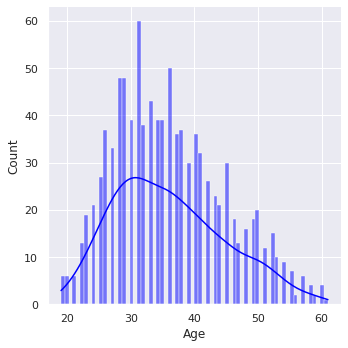

In [98]:

sns.displot(data['Age'].dropna(), kde= True, color = 'blue', bins = 70)

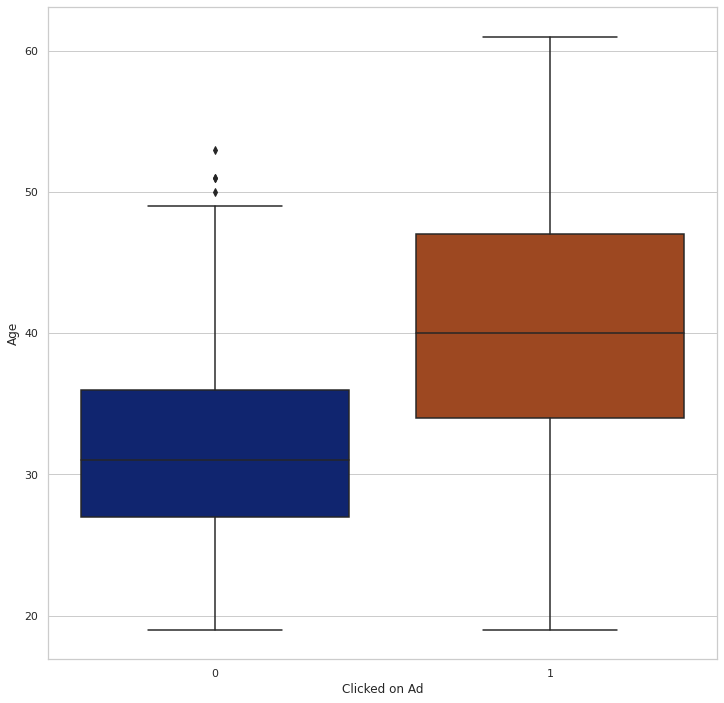

In [99]:
sns.set_style('whitegrid')
sns.boxplot(x = 'Clicked on Ad', y = 'Age', data = data, palette = 'dark')

The older a person is the more likely they are to click on a AD

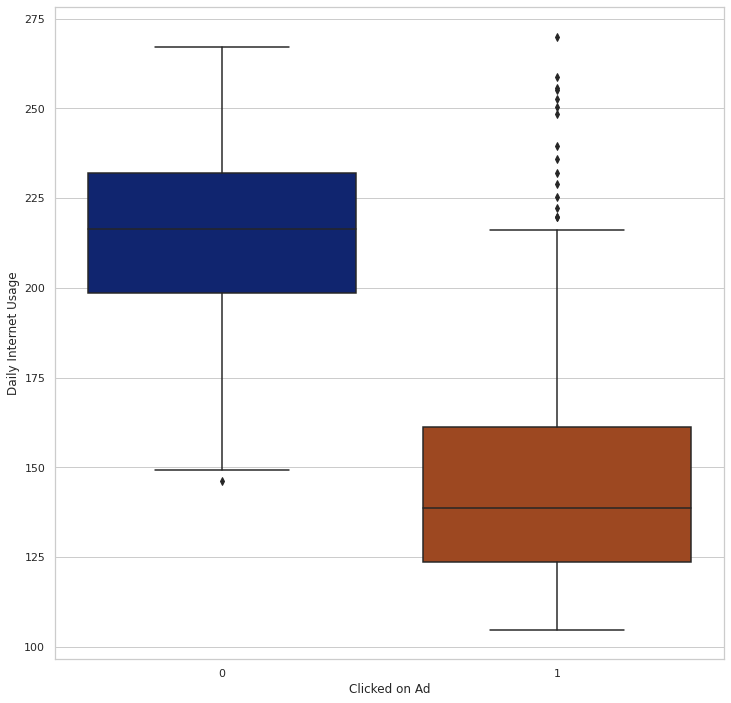

In [100]:
sns.boxplot(x = 'Clicked on Ad', y = 'Daily Internet Usage', data = data, palette = 'dark')

From what can be seen people with lower daily internet usage are more likely to click on ads 

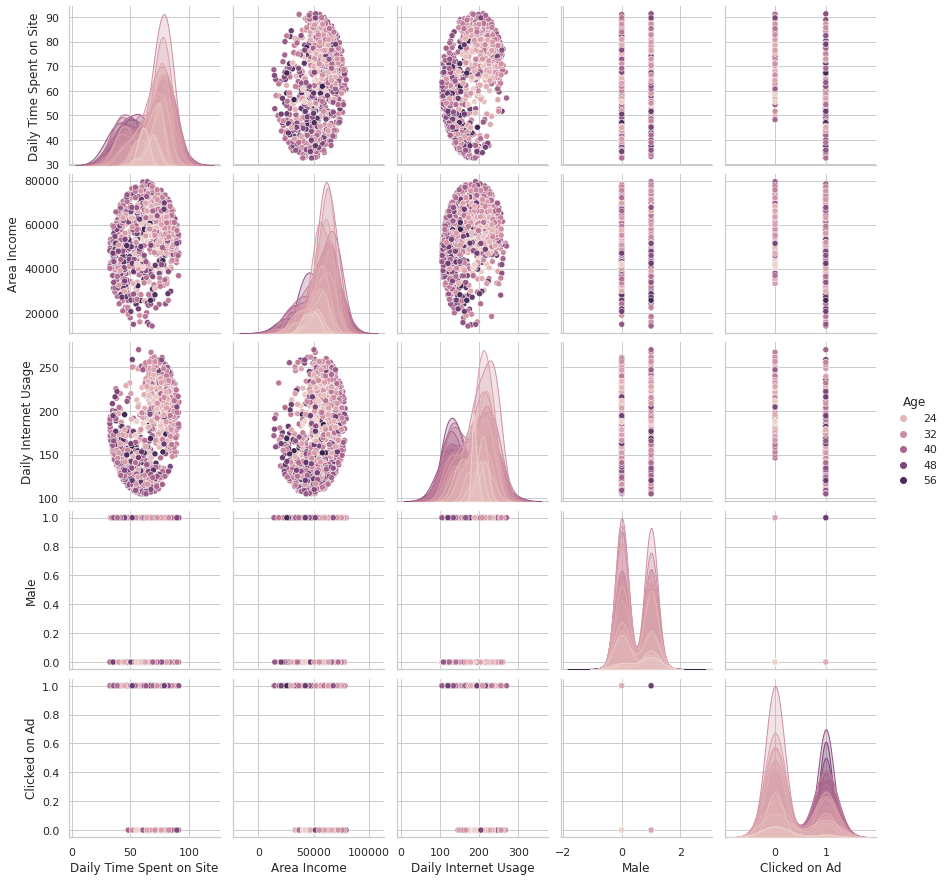

In [101]:
sns.pairplot(data,  hue = 'Age')

In [102]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0


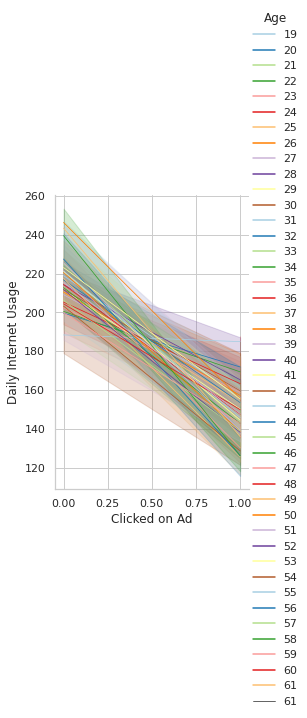

In [103]:
sns.relplot(
    data=data,
    x="Clicked on Ad", y="Daily Internet Usage",
    hue="Age", size=61, col=2,
    kind="line", size_order=["T1", "T2"], palette='Paired',
    height=5, aspect=.75, facet_kws=dict(sharex=False),)

sns.set(rc={"figure.figsize":(12, 12)})


#Task 6: Compute the Cost Function

There is no cost function needed

#Task 7: Compute the Gradient Descent

There is no gradient decent needed

#Task 8: Visualizing the Cost Function

NO COST FUNCTION

#Task 9: Conduct The Logical Regression of the Data

###Train test split

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X = data.iloc[:, [2, 3]].values
y = data.iloc[:, -1].values

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

###Scaling

In [107]:
from sklearn.preprocessing import StandardScaler

In [108]:
sc = StandardScaler()

In [109]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

###Making logistic model

In [110]:
from sklearn.linear_model import LogisticRegression

In [111]:
regression = LogisticRegression(random_state= 0)

In [112]:
regression.fit(X_train, y_train)

LogisticRegression(random_state=0)

#Task 10: Making Predictions

In [113]:
y_pred = regression.predict(X_test)

In [114]:
predicition = regression.predict(X_test)

In [115]:
print("The prediction accuracy of the model is ", + regression.score(X_test, y_test)*100, " percent")
pp = regression.predict(X_test)
print('Number of people to click an ad out of 250 is: ', sum(pp!=0))
print('Number of people to not click an add out of 250 people is: ',sum(pp==0) ) 

The prediction accuracy of the model is  91.2  percent
Number of people to click an ad out of 250 is:  122
Number of people to not click an add out of 250 people is:  128
